In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('kmeans_patient_data.csv')

X = df[["Symptom_Severity", "Medical_History"]]

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

cluster_names = {0: "Virtual", 1: "On-Site"}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

In [12]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nClustered Data:\n", df)

df.to_csv("kmeans_patient_data_clustered.csv", index=False)

Cluster Centers:
 [[2.66666667 3.66666667]
 [7.5        7.5       ]]

Clustered Data:
    Patient  Symptom_Severity  Medical_History  Cluster Cluster_Name
0        1                 1                2        0      Virtual
1        2                 3                5        0      Virtual
2        3                 9                8        1      On-Site
3        4                 6                7        1      On-Site
4        5                 4                4        0      Virtual


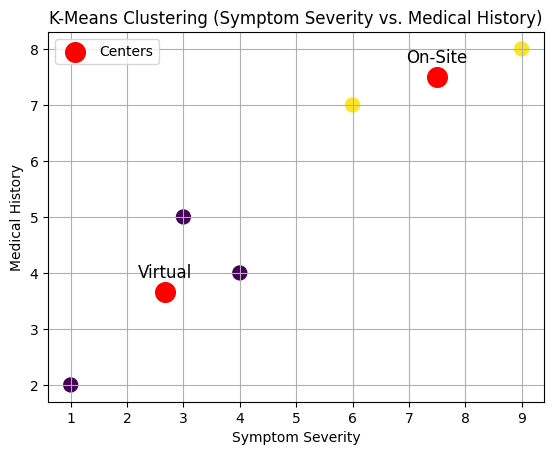

In [13]:
plt.scatter(X['Symptom_Severity'], X['Medical_History'], c=kmeans.labels_, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker="o", s=200, label="Centers")

for i, center in enumerate(kmeans.cluster_centers_):
    plt.annotate("Virtual" if i == 0 else "On-Site",
                 (center[0], center[1]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', fontsize=12, color='black')

plt.title("K-Means Clustering (Symptom Severity vs. Medical History)")
plt.xlabel("Symptom Severity")
plt.ylabel("Medical History")

plt.legend()
plt.grid(True)
plt.show()
